# Stratified Train/Test split for continuous variables

To build a robust Regression model (e.g. Linear Regression, Random Forest Regressor, XGB Regressor) it is paramount to use cross validation and tuning. Even then the model may overfit on the training set and not generalise to the test set. This is often due to the train and test dataset not having the same distribution.

For classification one can use StratifiedShuffleSplit (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) to avoid this issue. Sadly `sklearn` has not implemented this Class for continuous target variables yet. 

Below you can find my code which takes a continuous target variable and splits it into 10 bins based on quantiles (i.e. the lowest 10% of numbers are bin=0, etc.). These bin definitions can then be injested by `train_test_split` to split the dataset into `y_train` and `y_test` which have the same distribution.

In [1]:
# import relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ks_2samp
from sklearn.model_selection import train_test_split

#### Dataframes

Create demo dataframe with 100,000 rows and 6 columns, where target variable (`y`) is exponential. 
I plotted the distribution to illustrate.

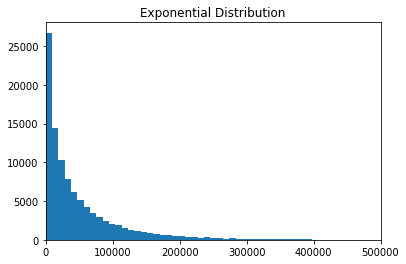

In [2]:
X = pd.DataFrame(np.random.rand(100000,5))
y = pd.Series(np.random.exponential(range(100000), 100000))

plt.hist(y, bins = 100)
plt.title('Exponential Distribution', fontsize=12)
plt.xlim([0,500000]);

#### Quantiles
Splitting `y` into 10 bins based on quantiles.

In [3]:
quantile_bins = pd.qcut(y, q=10, precision=1, labels=False)
quantile_bins.head(), quantile_bins.tail()

(0    0
 1    0
 2    0
 3    0
 4    0
 dtype: int64, 99995    8
 99996    7
 99997    6
 99998    3
 99999    9
 dtype: int64)

#### Train / Test split
Use `train_test_split` to split the dataset into train and test set.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify = quantile_bins)

#### Train / Test distribution

Use Kolmogorov-Smirnov statistic on 2 samples (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ks_2samp.html) to determine if `y_train` and `y_test` have the same distribution. The higher `p`, the better.

In [5]:
stats, p = ks_2samp(y_train, y_test)
print('statistic:', stats, '\np_value:', p)
assert p >= 0.95

statistic: 0.002580952380952385 
p_value: 0.9989952158999355
